In [6]:
import os
import shutil

# Path to the UTKFace dataset folder
dataset_path = "C:/Projects/Facial_Gender_Detection/Dataset/UTKFace"  # Replace with the path to your UTKFace folder
output_folder = "separated_utkface"  # Folder to store separated images

# Create output folders for male and female
male_folder = os.path.join(output_folder, "male")
female_folder = os.path.join(output_folder, "female")
os.makedirs(male_folder, exist_ok=True)
os.makedirs(female_folder, exist_ok=True)

# Iterate through each file in the dataset folder
for img_file in os.listdir(dataset_path):
    if img_file.endswith(".jpg"):  # Check if the file is an image
        # Extract gender from the filename
        gender = img_file.split("_")[1]  # Gender is the second field in the file name
        if gender == "0":  # Male
            shutil.move(os.path.join(dataset_path, img_file), male_folder)
        elif gender == "1":  # Female
            shutil.move(os.path.join(dataset_path, img_file), female_folder)

print("Images have been separated into 'male' and 'female' folders.")

Images have been separated into 'male' and 'female' folders.


In [7]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Paths
input_folder = "C:/Projects/Facial_Gender_Detection/separated_utkface"  # Folder containing the separated images
output_folder = "split_utkface"  # Folder to store split datasets
os.makedirs(output_folder, exist_ok=True)

# Create sub-folders for train, val, and test
for split in ["train", "val", "test"]:
    for gender in ["male", "female"]:
        os.makedirs(os.path.join(output_folder, split, gender), exist_ok=True)

# Split and copy files
for gender in ["male", "female"]:
    gender_folder = os.path.join(input_folder, gender)
    images = os.listdir(gender_folder)
    
    # Train-Validation-Test Split (70%-20%-10%)
    train, temp = train_test_split(images, test_size=0.3, random_state=42)
    val, test = train_test_split(temp, test_size=0.33, random_state=42)  # 0.33 * 0.3 = 10%

    # Copy files to respective folders
    for split, split_images in zip(["train", "val", "test"], [train, val, test]):
        for img_file in split_images:
            shutil.copy(os.path.join(gender_folder, img_file), os.path.join(output_folder, split, gender))

print("Dataset split into 'train', 'val', and 'test' folders.")

Dataset split into 'train', 'val', and 'test' folders.


In [8]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [9]:
# Paths to the dataset
base_dir = "split_utkface"  # Replace with the path to your split dataset folder

# Image Data Generators (Rescaling pixel values and loading data)
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, "train"),
    target_size=(128, 128),  # Resize images to 128x128
    batch_size=32,
    class_mode="binary"  # Binary classification (male, female)
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(base_dir, "val"),
    target_size=(128, 128),
    batch_size=32,
    class_mode="binary"
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(base_dir, "test"),
    target_size=(128, 128),
    batch_size=32,
    class_mode="binary"
)

Found 16594 images belonging to 2 classes.
Found 4766 images belonging to 2 classes.
Found 2348 images belonging to 2 classes.


In [10]:
# Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,  # You can increase epochs for better results
    verbose=1
)

# Save the Model
model.save("gender_classifier_model.h5")
print("Model trained and saved as 'gender_classifier_model.h5'")

Epoch 1/10
519/519 [==============================] - 522s 1s/step - loss: 0.4326 - accuracy: 0.7971 - val_loss: 0.3322 - val_accuracy: 0.8514
Epoch 2/10
519/519 [==============================] - 280s 540ms/step - loss: 0.3150 - accuracy: 0.8630 - val_loss: 0.2871 - val_accuracy: 0.8722
Epoch 3/10
519/519 [==============================] - 277s 533ms/step - loss: 0.2783 - accuracy: 0.8781 - val_loss: 0.2842 - val_accuracy: 0.8758
Epoch 4/10
519/519 [==============================] - 277s 533ms/step - loss: 0.2569 - accuracy: 0.8910 - val_loss: 0.2718 - val_accuracy: 0.8798
Epoch 5/10
519/519 [==============================] - 276s 531ms/step - loss: 0.2317 - accuracy: 0.9006 - val_loss: 0.2689 - val_accuracy: 0.8823
Epoch 6/10
519/519 [==============================] - 273s 527ms/step - loss: 0.2129 - accuracy: 0.9075 - val_loss: 0.2725 - val_accuracy: 0.8894
Epoch 7/10
519/519 [==============================] - 276s 532ms/step - loss: 0.1973 - accuracy: 0.9157 - val_loss: 0.2612 - va

C:\Users\nitin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model trained and saved as 'gender_classifier_model.h5'


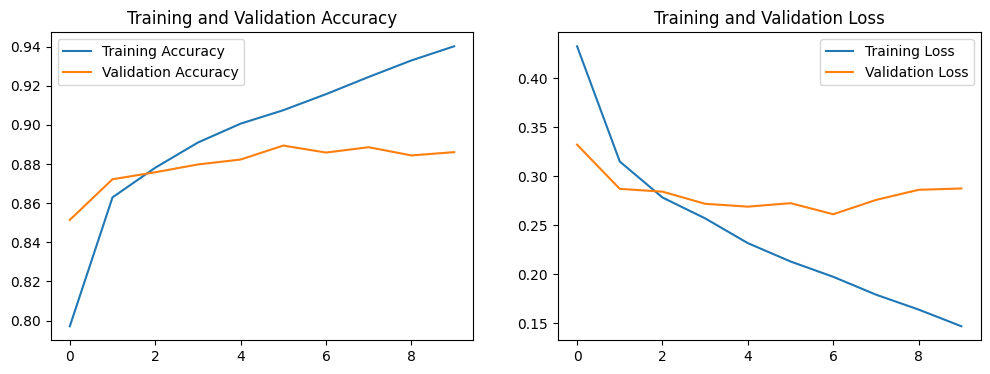

74/74 [==============================] - 43s 580ms/step - loss: 0.2486 - accuracy: 0.9008
Test Loss: 0.24856434762477875
Test Accuracy: 0.9007666110992432


In [11]:
# Plot Training and Validation Accuracy & Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# Evaluate on Test Set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

In [28]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the Trained Model
model = tf.keras.models.load_model("gender_classifier_model.h5")

# Path to the New Image
img_path = "C:/Users/nitin/OneDrive/Desktop/1.jpg"  # Replace with the path to your image

# Preprocess the Image
img = image.load_img(img_path, target_size=(128, 128))  # Resize to 128x128
img_array = image.img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make Prediction
raw_prediction = model.predict(img_array)
print(f"Raw Prediction (Sigmoid Output): {raw_prediction[0][0]}")

# Interpret the Prediction
# Adjust the threshold value if needed
threshold = 0.5  # Default threshold
gender = "Female" if raw_prediction < threshold else "Male"
print(f"Predicted Gender: {gender}")

1/1 [==============================] - 0s 217ms/step
Raw Prediction (Sigmoid Output): 0.9999861717224121
Predicted Gender: Male
